In [1]:
import gymnasium as gym
from minigrid.envs import FourRoomsEnv, LavaGapEnv, LockedRoomEnv, PlaygroundEnv, DistShiftEnv
import time
from minigrid.rendering.rendering_manager import RenderingManager
from minigrid.rendering.pretty_rendering_manager import PrettyRenderingManager
import numpy as np

env = PlaygroundEnv(render_mode='human', rendering_manager=PrettyRenderingManager)
total_frames = []
observation, info = env.reset()
for _ in range(50):
    rand = np.random.rand()
    action = 2

    if rand < 0.1:
        action = 1
    elif rand < 0.2:
        action = 2
    elif rand < 0.5:
        action = 3
    elif rand < 0.8:
        action = 4

    observation, reward, terminated, truncated, info = env.step(action)



    if terminated or truncated:
        observation, info = env.reset()

    

env.close()


0 -1
New episode
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50


In [16]:
print(total_frames)

[array([[[ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38]],

       [[ 38,  38,  38],
        [ 50,  39,  27],
        [119, 104,  59],
        ...,
        [119, 104,  59],
        [ 50,  39,  27],
        [ 38,  38,  38]],

       [[ 38,  38,  38],
        [119, 104,  59],
        [ 76,  68,  46],
        ...,
        [ 76,  68,  46],
        [119, 104,  59],
        [ 38,  38,  38]],

       ...,

       [[ 38,  38,  38],
        [ 50,  39,  27],
        [ 50,  39,  27],
        ...,
        [ 50,  39,  27],
        [ 50,  39,  27],
        [ 38,  38,  38]],

       [[ 38,  38,  38],
        [ 50,  39,  27],
        [ 50,  39,  27],
        ...,
        [ 50,  39,  27],
        [ 50,  39,  27],
        [ 38,  38,  38]],

       [[ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38]

In [12]:
!pip install imageio



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


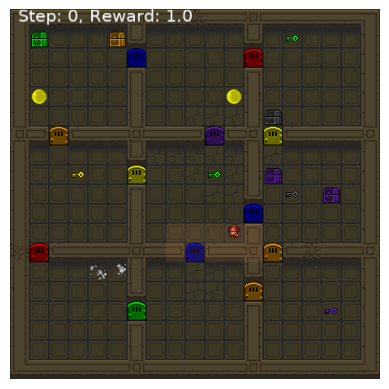

In [13]:
import matplotlib.pyplot as plt

plt.imshow(total_frames[0])
plt.axis("off")  # hide axis if desired
plt.show()

In [14]:
import imageio

# Save frames as a GIF with ~10 FPS
imageio.mimsave('playground.gif', total_frames, fps=10)
